In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle
import numpy as np
from tqdm import tqdm

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

## Slices

In [12]:
def plot_silces_multi_runs(r_s, i, k, plot_log=True, save_fn=None, titles=None, shift_mean=False, plot_delta=False, individual_cbar=False):

    plot_n = len(r_s)
    if plot_delta:
        plot_n += 1

    fig, axs = plt.subplots(1, plot_n, figsize=(6*plot_n, 7))
    if plot_n == 1:
        axs = [axs]

    z_s = [r[k][i] for r in r_s]
    if k == 'x_H_slice':
        z_s = [1-z for z in z_s]
    z_mean_s = [np.mean(z) for z in z_s]
    if shift_mean:
        z_s = [z/z_mean_s[i_plot] for i_plot, z in enumerate(z_s)]
    if plot_log:
        z_s = [np.log10(z) for z in z_s]
    vmin = np.quantile(np.concatenate(z_s), 0.02)
    vmax = np.quantile(np.concatenate(z_s), 0.98)

    for i_plot in range(len(r_s)):
        ax = axs[i_plot]
        if individual_cbar:
            im = ax.imshow(z_s[i_plot], origin='lower')
            fig.colorbar(im, ax=ax, orientation='horizontal')
        else:
            im = ax.imshow(z_s[i_plot], origin='lower', vmin=vmin, vmax=vmax)
        title = titles[i_plot] if titles is not None else ''
        ax.set_title(f"{title} mean={z_mean_s[i_plot]:.3e}")

    k_title = k if k != 'x_H_slice' else '1-x_H_slice'
    fig.suptitle(f"{k_title}, $z$={r_s[0]['z'][i]:.3f}")
    if not individual_cbar:
        fig.colorbar(im, ax=axs[:len(r_s)], orientation='horizontal', aspect=len(r_s)*20)
    if plot_delta:
        ax = axs[-1]
        im_delta = ax.imshow(r_s[0]['delta_slice'][i], origin='lower', cmap='binary')
        ax.set_title('delta')
        fig.colorbar(im_delta, ax=axs[-1], orientation='horizontal', aspect=20)

    if save_fn is not None:
        fig.savefig(save_fn)
        plt.close(fig)

In [5]:
run_names = [
    # 'sf_xunifx100_nodplus1_nopop2',
    # 'sf_xunifx100_nodplus1_dc_noLX_nopop2_uddn',
    # 'sf_xdecayx100_nodplus1_nopop2',
    # 'sf_xdecayx100_nodplus1_dc_noLX_nopop2_uddn',
    # 'sf_xdecayx100_dc_noLX_nodplus1_nopop2_uddn_xrayots',
    # 'sf_xdecayx100_dc_noLX_nodplus1_nopop2_uddn_xrayots_cut500',
    'sf_xdecayx100_nodplus1_nopop2_zf001_Rmax32',
    'sf_xdecayx100_nodplus1_dc_noLX_nopop2_uddn_zf001_Rmax32',
    'sf_xdecayx100_nodplus1_dc_noLX_nopop2_uddn_xrayots_cut500_zf001',
]
r_s = [np.load(f"../outputs/dm21cm/{rn}_records.npy", allow_pickle=True).item() for rn in run_names]
# titles = ['21cmFAST', 'DM21cm', 'DM21cm xray OTS', 'DM21cm xray OTS cut500']
titles = ['21cmFAST zf001 Rmax32', 'DM21cm zf001 Rmax32', 'DM21cm xray OTS zf001 Rmax32 cut500']

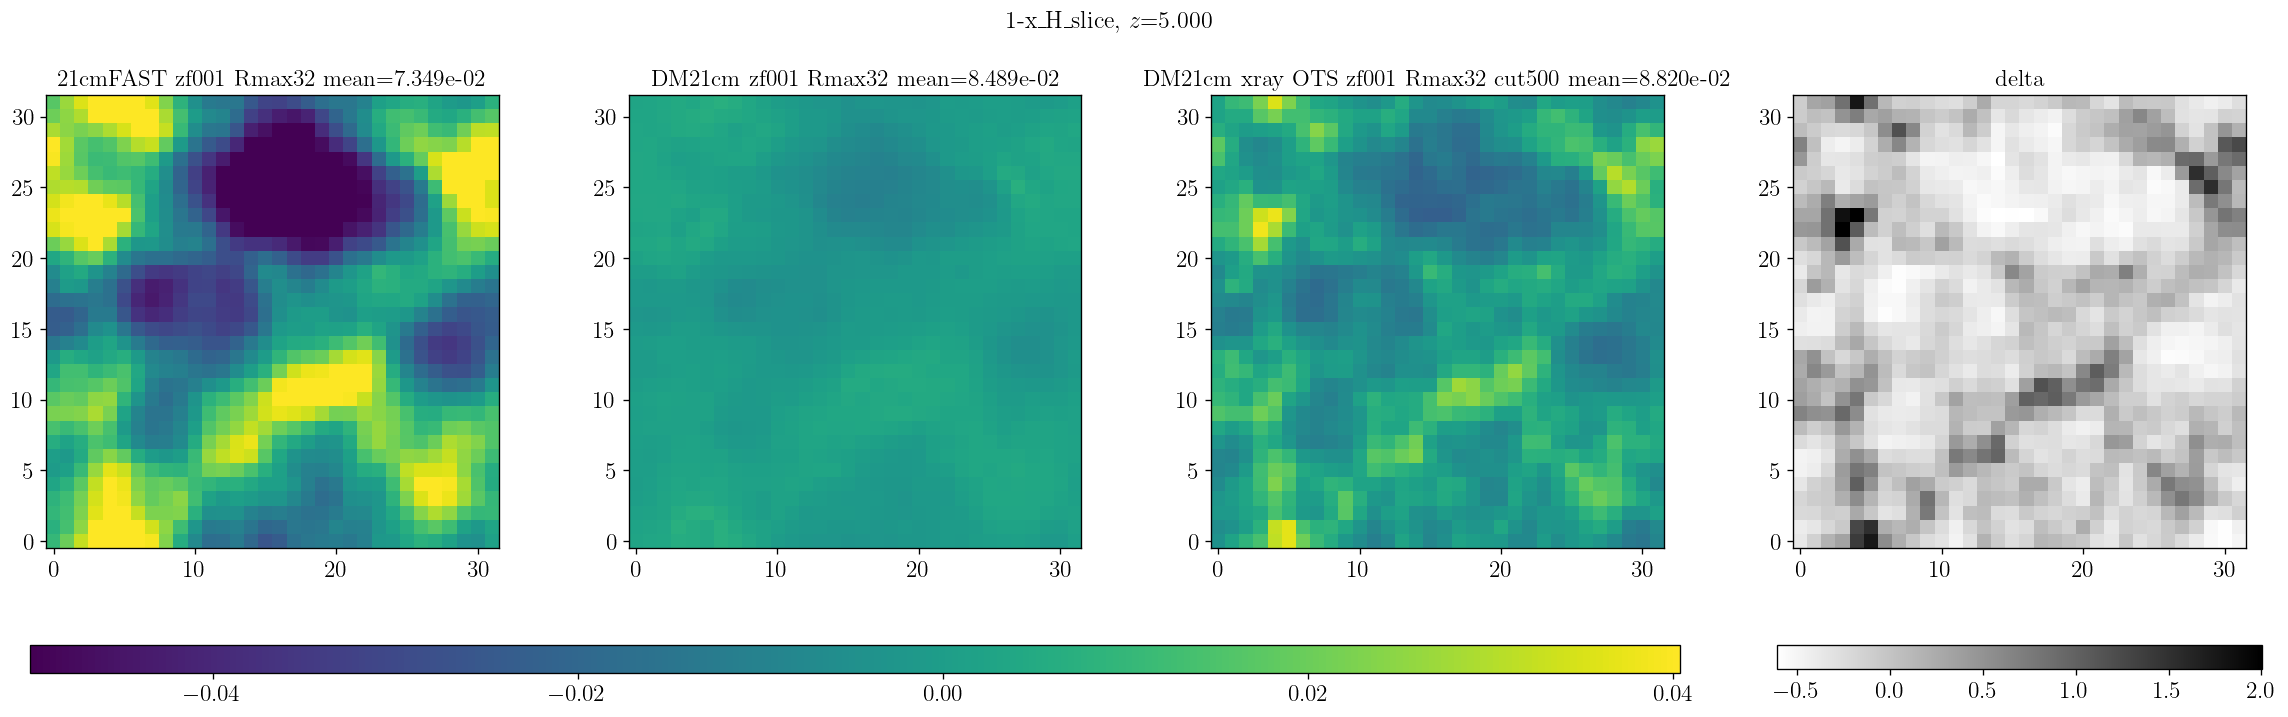

In [13]:
plot_silces_multi_runs(r_s, -1, 'x_H_slice', titles=titles, plot_delta=True, shift_mean=True)

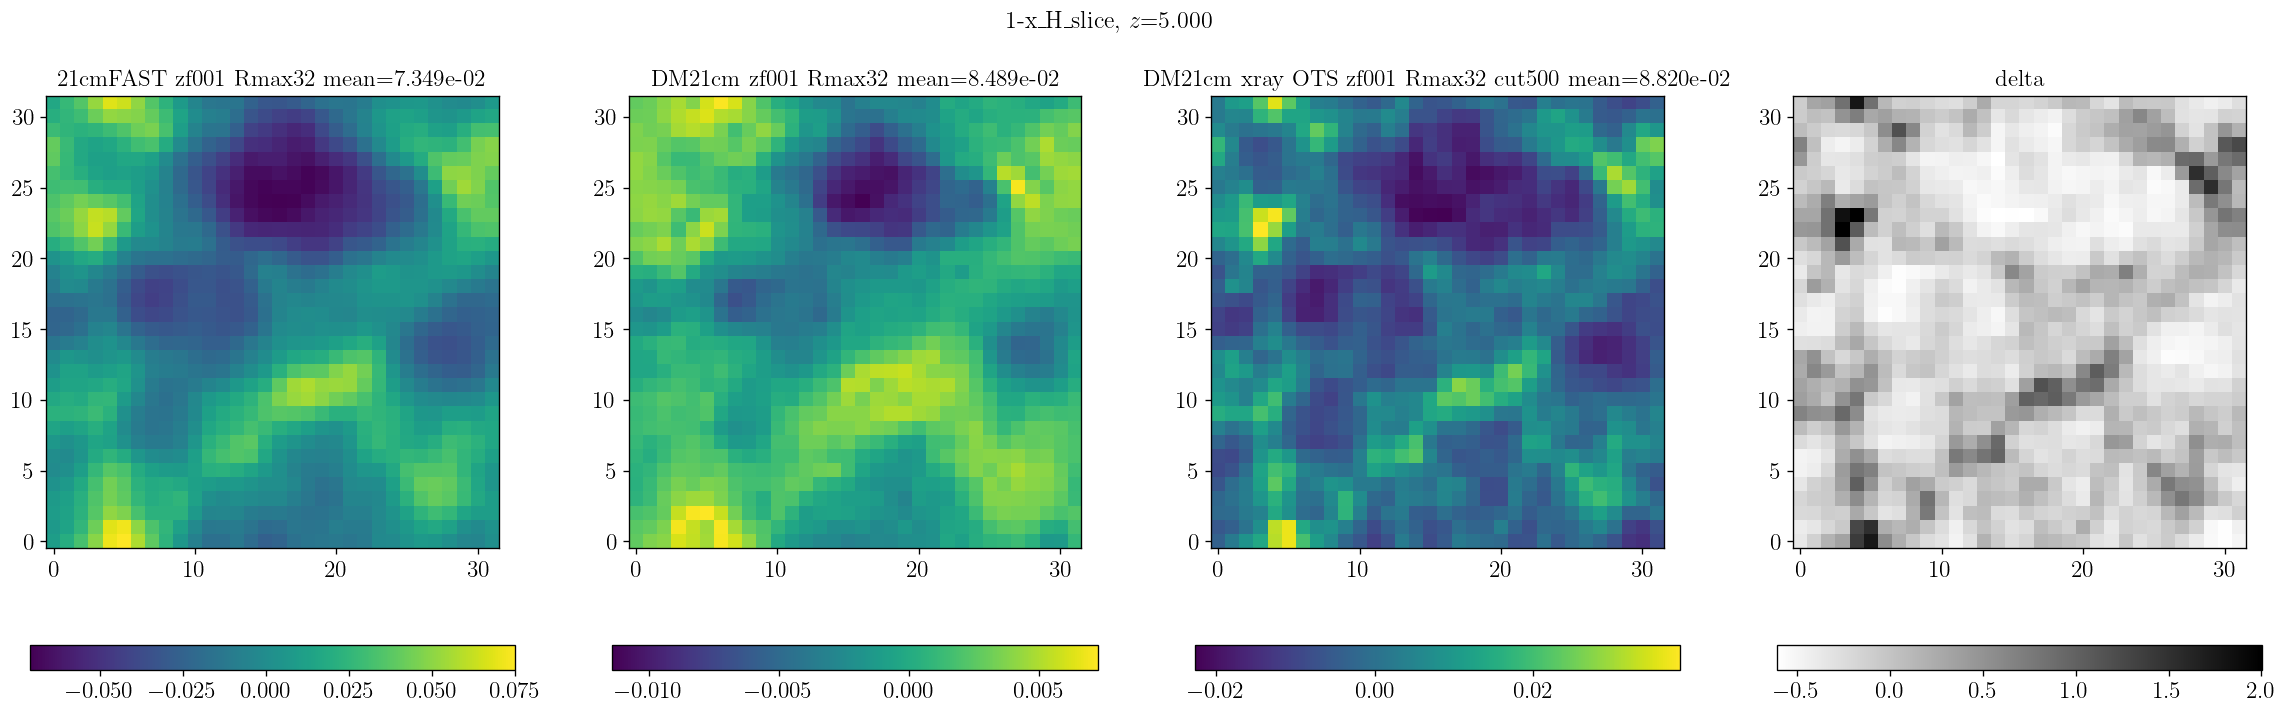

In [14]:
plot_silces_multi_runs(r_s, -1, 'x_H_slice', titles=titles, plot_delta=True, shift_mean=True, individual_cbar=True)

## Shell contribution

In [ ]:
def shell_dc(rec):
    r = np.append(rec['r'], 0.)
    x = rec['1-x_H']
    norm = 2 / (3*phys.kB*(1+x)) / phys.A_per_B
    ax.plot(r, norm*rec['shellinfo']['heat'] / np.abs(np.diff(r)), '-s', )

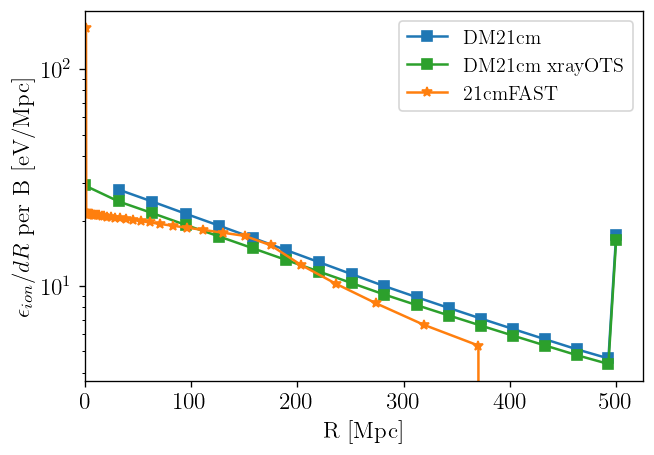

In [ ]:
R_DC = np.concatenate([shellinfo['R2'], np.array([0.])])
norm = 2 / (3*phys.kB*(1+x_e_mean)) / phys.A_per_B
plt.plot(R_DC[:-1], norm*shellinfo['heat']/np.abs(np.diff(R_DC)), '-s', color='C0', label='DM21cm')

R_DC2 = np.concatenate([shellinfo2['R2'], np.array([-31.])])
norm2 = 2 / (3*phys.kB*(1+x_e_mean2)) / phys.A_per_B
plt.plot(R_DC2[:-1], norm2*shellinfo2['heat']/np.abs(np.diff(R_DC2)), '-s', color='C2', label='DM21cm xrayOTS')

R_PC = np.concatenate([r_vals, np.array([0.])])
plt.plot(R_PC[:-1], si_mean/np.diff(R_PC), '-*', color='C1', label='21cmFAST')
plt.xlim(0, None)
plt.yscale('log')
plt.xlabel('R [Mpc]')
plt.ylabel(r'$\epsilon_{ion}/dR$ per B [eV/Mpc]')
plt.legend()

In [ ]:
def r_vals_pc():
    L_FACTOR = 0.620350491
    BOX_LEN = 64
    HII_DIM = 32
    R = L_FACTOR * BOX_LEN/HII_DIM
    R_factor = pow(p21c.global_params.R_XLy_MAX/R, 1/p21c.global_params.NUM_FILTER_STEPS_FOR_Ts)

    r_vals = R * R_factor ** np.arange(40)
    return r_vals

## GIF

In [24]:
for i in range(0, 200, 5):
    plot_silces_multi_runs(i, 'x_H_slice', titles=run_names, plot_delta=True, save_fn=f"plots/slices/tmp/{i}.png")

In [25]:
from PIL import Image

def create_gif_from_filelist(file_list, output_gif_path, interval_time):
    images = [Image.open(file_path) for file_path in file_list]
    images[0].save(output_gif_path, save_all=True, append_images=images[1:], duration=interval_time * 1000, loop=0)

In [26]:
flist = []
for i in np.arange(0, 200, 5):
    flist.append(f"plots/slices/tmp/{i}.png")

create_gif_from_filelist(flist, "x_H.gif", 0.5)

## A1. Global

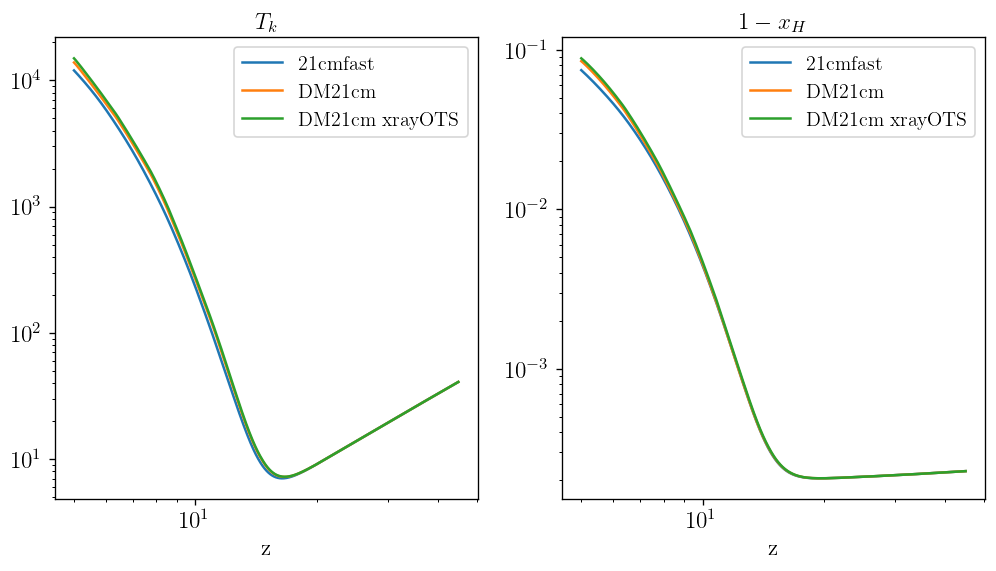

In [ ]:
labels=['21cmfast', 'DM21cm', 'DM21cm xrayOTS']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ax = axs[0]
for r, rn in zip(r_s, labels):
    ax.plot(r['z'], r['T_k'], label=rn)
ax.set(title='$T_k$', xlabel='z')
ax.set(xscale='log', yscale='log')
ax.legend()

ax = axs[1]
for r, rn in zip(r_s, labels):
    ax.plot(r['z'], r['1-x_H'], label=rn)
ax.set(title='$1-x_H$', xlabel='z')
ax.set(xscale='log', yscale='log')
ax.legend()

In [ ]:
rn = 'sf_xdecayx100_nodplus1_dc_noLX_nopop2_uddn'
r = np.load(f"../outputs/dm21cm/{rn}_records.npy", allow_pickle=True).item()
shellinfo = r['shell_dep_info'][-1]
x_e_mean = r['x_e'][-1]

In [ ]:
rn2 = 'sf_xdecayx100_nodplus1_dc_noLX_nopop2_uddn_xrayots_cut500_zf001'
r2 = np.load(f"../outputs/dm21cm/{rn2}_records.npy", allow_pickle=True).item()
shellinfo2 = r2['shell_dep_info'][-1]
x_e_mean2 = r2['x_e'][-1]

In [ ]:
rnpc = 'sf_xdecayx100_nodplus1_nopop2'
si = pickle.load(open(f"../outputs/dm21cm/{rnpc}_shellinfo.p", 'rb'))
si_mean = np.mean(si, axis=(1, 2, 3))

In [ ]:
sys.path.append("..")
import dm21cm.physics as phys
import py21cmfast as p21c

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [ ]:
plt.plot(si_mean, '*', color='C1')
plt.ylabel("dT")
plt.xlabel("shell number")

In [ ]:
global_params = p21c.global_params

L_FACTOR = 0.620350491
BOX_LEN = 64
HII_DIM = 32
R = L_FACTOR* BOX_LEN/HII_DIM
R_factor = pow(global_params.R_XLy_MAX/R, 1/global_params.NUM_FILTER_STEPS_FOR_Ts)

r_vals = R*R_factor**np.arange(40)

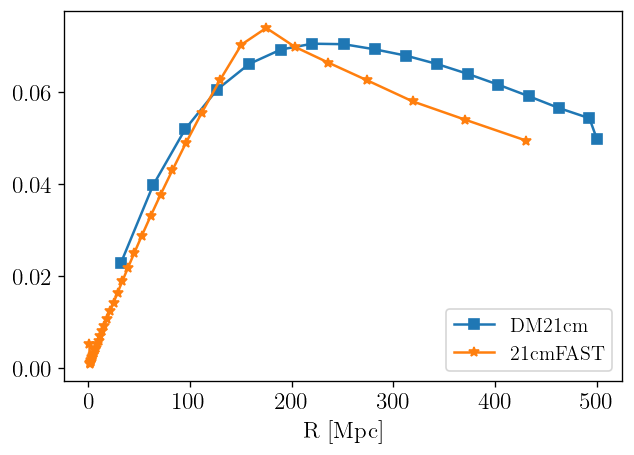

In [ ]:

plt.plot(shellinfo['R2'], shellinfo['R2']*shellinfo['heat']/np.sum(shellinfo['R2']*shellinfo['heat']), '-s', color='C0', label='DM21cm')

plt.plot(r_vals, si_mean/np.sum(si_mean), '-*', color='C1', label='21cmFAST')
#plt.ylim(1e-2, None)
#plt.yscale('log')
plt.xlabel('R [Mpc]')
#plt.ylabel(r'$\epsilon_{ion}/dR$ per B [eV/Mpc]')
plt.legend()

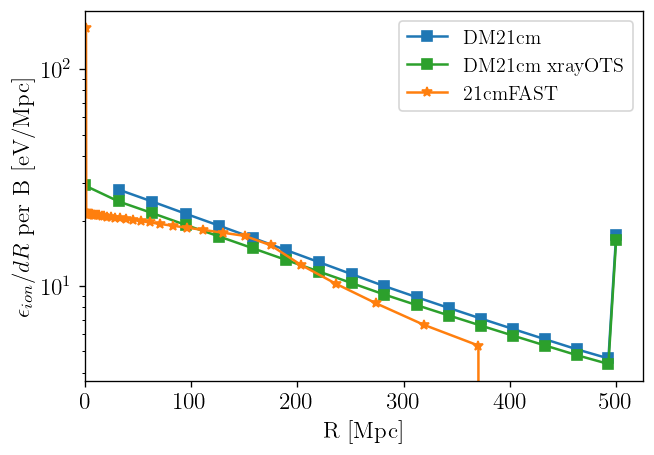

In [ ]:
R_DC = np.concatenate([shellinfo['R2'], np.array([0.])])
norm = 2 / (3*phys.kB*(1+x_e_mean)) / phys.A_per_B
plt.plot(R_DC[:-1], norm*shellinfo['heat']/np.abs(np.diff(R_DC)), '-s', color='C0', label='DM21cm')

R_DC2 = np.concatenate([shellinfo2['R2'], np.array([-31.])])
norm2 = 2 / (3*phys.kB*(1+x_e_mean2)) / phys.A_per_B
plt.plot(R_DC2[:-1], norm2*shellinfo2['heat']/np.abs(np.diff(R_DC2)), '-s', color='C2', label='DM21cm xrayOTS')

R_PC = np.concatenate([r_vals, np.array([0.])])
plt.plot(R_PC[:-1], si_mean/np.diff(R_PC), '-*', color='C1', label='21cmFAST')
plt.xlim(0, None)
plt.yscale('log')
plt.xlabel('R [Mpc]')
plt.ylabel(r'$\epsilon_{ion}/dR$ per B [eV/Mpc]')
plt.legend()